## Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from pylab import rcParams
from sklearn import preprocessing

#### Let us read the csv file and load the data

In [2]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Check the number of null values and column data types

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Check survival count per sex

<Axes: xlabel='Survived', ylabel='count'>

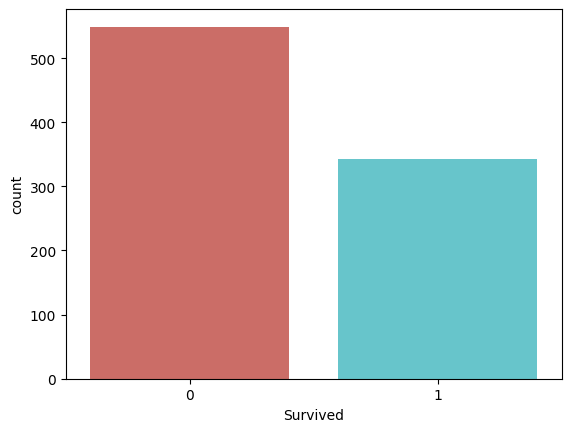

In [4]:
sns.countplot(data=titanic_df, x='Survived', palette='hls')

#### We will proceed on data cleaning

In [5]:
# titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_df = titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### Since AGE has the MOST Null Value, we'll work on it first.

<Axes: xlabel='SibSp', ylabel='Age'>

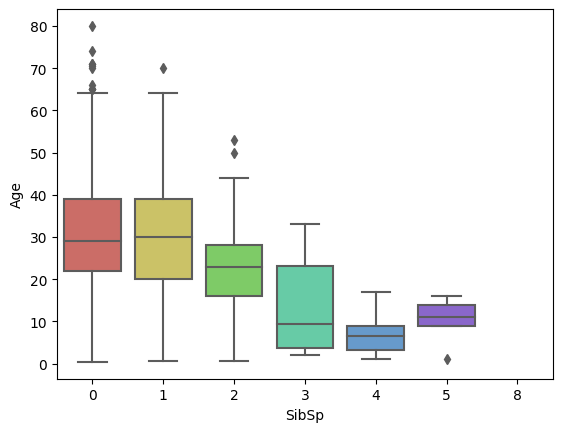

In [6]:
sns.boxplot( data=titanic_df, x='SibSp', y='Age', palette='hls')

<Axes: xlabel='Parch', ylabel='Age'>

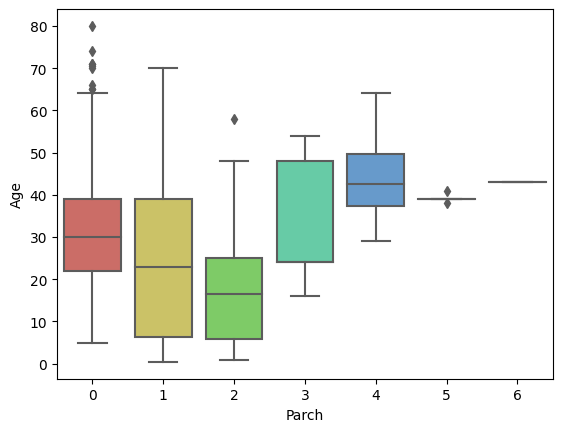

In [7]:
sns.boxplot( data=titanic_df, x='Parch', y='Age', palette='hls')

In [8]:
parch_grouped = titanic_df.groupby(titanic_df['Parch'])
parch_age_means = parch_grouped['Age'].mean()
parch_age_means

Parch
0    32.178503
1    24.422000
2    17.216912
3    33.200000
4    44.500000
5    39.200000
6    43.000000
Name: Age, dtype: float64

In [9]:
def fill_null(x):
    if pd.isnull(x['Age']):
        return parch_age_means[x['Parch']]
    return x['Age']

titanic_df['Age'] = titanic_df[['Age', 'Parch']].apply(fill_null, axis=1)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [10]:
titanic_df = titanic_df.dropna()
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
sex_series = titanic_df['Sex']
encoded_sex = encoder.fit_transform(sex_series)
encoded_sex[0:2]

#from series to dataframe -> for concat later
sex_df = pd.DataFrame(encoded_sex, columns=['MaleSex'])
sex_df.head()

,MaleSex
0,1
1,0
2,0
3,0
4,1


In [12]:
sex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   MaleSex  889 non-null    int32
dtypes: int32(1)
memory usage: 3.6 KB


In [13]:
embarked_series = titanic_df['Embarked']
encoded_embarked = encoder.fit_transform(embarked_series)
encoded_embarked[0:20]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0])

<i>We need a numeric or binary for our data model</i>

In [14]:
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder(categories='auto')
embarked_oh = oh_encoder.fit_transform(encoded_embarked.reshape(-1,1))
embarked_array = embarked_oh.toarray()
embarked_df = pd.DataFrame(embarked_array, columns=['C', 'Q', 'S'])
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [15]:
embarked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       889 non-null    float64
 1   Q       889 non-null    float64
 2   S       889 non-null    float64
dtypes: float64(3)
memory usage: 21.0 KB


<i>We can drop now both SEX and EMBARKED</i>

In [16]:
titanic_df = titanic_df.drop(['Sex', 'Embarked'], axis=1,)
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


#### We can now start creating dummy data for our model

In [17]:
dummy_df = pd.concat([titanic_df, sex_df, embarked_df], verify_integrity=True, axis=1).astype(float)
dummy_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleSex,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


In [18]:
dummy_df.drop(['Fare','Pclass'], axis=1, inplace=True)
dummy_df.head()

,PassengerId,Survived,Age,SibSp,Parch,MaleSex,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [19]:
# dummy_df.dropna(inplace=True)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 829
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    float64
 4   Parch        889 non-null    float64
 5   MaleSex      889 non-null    float64
 6   C            889 non-null    float64
 7   Q            889 non-null    float64
 8   S            889 non-null    float64
dtypes: float64(9)
memory usage: 69.6 KB


<Axes: >

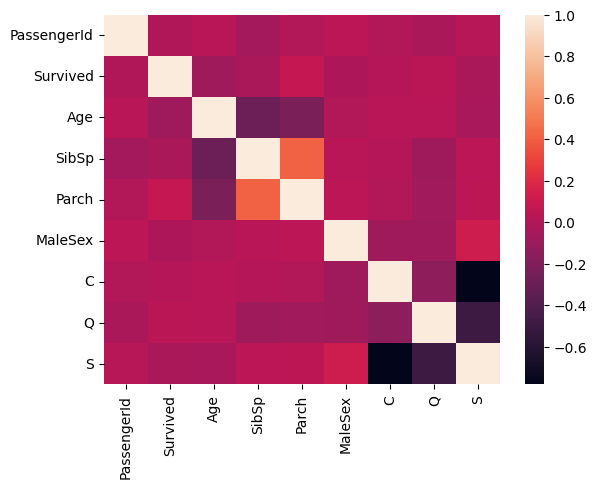

In [20]:
sns.heatmap(dummy_df.corr())

#### Create data set for training and testing

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_df = dummy_df.drop('Survived', axis=1)
y_df = dummy_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape, y_train.shape)

(712, 8) (712,)


In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 332 to 103
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  711 non-null    float64
 1   Age          711 non-null    float64
 2   SibSp        711 non-null    float64
 3   Parch        711 non-null    float64
 4   MaleSex      710 non-null    float64
 5   C            710 non-null    float64
 6   Q            710 non-null    float64
 7   S            710 non-null    float64
dtypes: float64(8)
memory usage: 50.1 KB


In [25]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 712 entries, 332 to 103
Series name: Survived
Non-Null Count  Dtype  
--------------  -----  
711 non-null    float64
dtypes: float64(1)
memory usage: 11.1 KB


#### Evaluate model using Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_pred = LogReg.predict(X_test)

#### Reporting

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [ ]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train, y_train_pred)

#### Testing

In [ ]:
dummy_df[700:701]

In [ ]:
test_passenger = pd.DataFrame(np.array([702.0, 35.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]).reshape(1,-1),
                              columns=['PassengerId', 'Age', 'SibSp', 'Parch', 'MaleSex', 'C', 'Q', 'S'])
print(LogReg.predict(test_passenger))
print(LogReg.predict_proba(test_passenger))